Arewa Data Science Academy

Deep Learning Cohort 1.0

Name: Saminu Mohammad Aliyu

Email: smaliyu.cs@buk.edu.ng

Title: Week 2 solution

Exercises Solution

In [53]:
#import necessary modules
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

In [54]:
#initialize
weights = 0.3
bias = 0.9

In [55]:
start = 0
stop = 1
step = 0.01

In [56]:
# straight line dataset
X = torch.arange(start, stop, step).unsqueeze(dim=1)
y = weights * X + bias
X.shape

torch.Size([100, 1])

In [57]:
#Create train_test split
train_split = int(0.8*len(X))

X_train, y_train, = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [76]:
def plot_pred(train_data=X_train,
              train_labels=y_train,
              test_data=X_test,
              test_labels=y_test,
              predictions=None):


  plt.figure(figsize=(10, 7))

  # Plot training data
  plt.scatter(train_data, train_labels, c="b", s=8, label="Training data")

  # Plot test data
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions
    plt.scatter(test_data, predictions, c="r", s=6, label="Predictions")

  # Show the legend
  plt.legend();

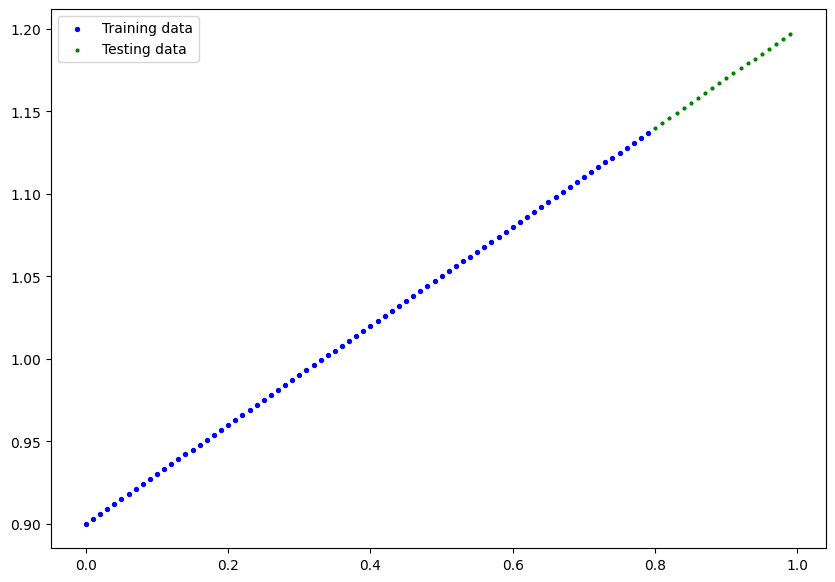

In [77]:
plot_pred();

In [78]:
# The pytorch model
class LinearRegressionModel(nn.Module):
  def __init__(self):
      super().__init__()
      self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))

      self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))


  def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias



In [79]:
#Model instance
torch.manual_seed(42)

model_1 = LinearRegressionModel()

model_1.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [80]:
# Loss funtion and optimizer
lossfn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [81]:
# Model training
torch.manual_seed(101)

epoch = 300

train_loss_val = []
test_loss_val = []
epoch_count = []

for epoch in range (epoch):
  model_1.train()

  y_pred = model_1(X_train)
  loss = lossfn(y_pred, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = lossfn(test_pred,y_test.type(torch.float))

    if epoch % 20 == 0:

      epoch_count.append(epoch)
      train_loss_val.append(loss.detach().numpy())
      test_loss_val.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.7566978335380554 | MAE Test Loss: 0.7248174548149109 
Epoch: 20 | MAE Train Loss: 0.5254928469657898 | MAE Test Loss: 0.4541124403476715 
Epoch: 40 | MAE Train Loss: 0.2942880392074585 | MAE Test Loss: 0.18340764939785004 
Epoch: 60 | MAE Train Loss: 0.07658576965332031 | MAE Test Loss: 0.07274086028337479 
Epoch: 80 | MAE Train Loss: 0.05255373567342758 | MAE Test Loss: 0.11581540107727051 
Epoch: 100 | MAE Train Loss: 0.045542728155851364 | MAE Test Loss: 0.10467890650033951 
Epoch: 120 | MAE Train Loss: 0.03868866711854935 | MAE Test Loss: 0.08938358724117279 
Epoch: 140 | MAE Train Loss: 0.03183453157544136 | MAE Test Loss: 0.07408786565065384 
Epoch: 160 | MAE Train Loss: 0.024982359260320663 | MAE Test Loss: 0.0581042543053627 
Epoch: 180 | MAE Train Loss: 0.018130185082554817 | MAE Test Loss: 0.04212062805891037 
Epoch: 200 | MAE Train Loss: 0.011278990656137466 | MAE Test Loss: 0.02579306997358799 
Epoch: 220 | MAE Train Loss: 0.004429381340742111 |

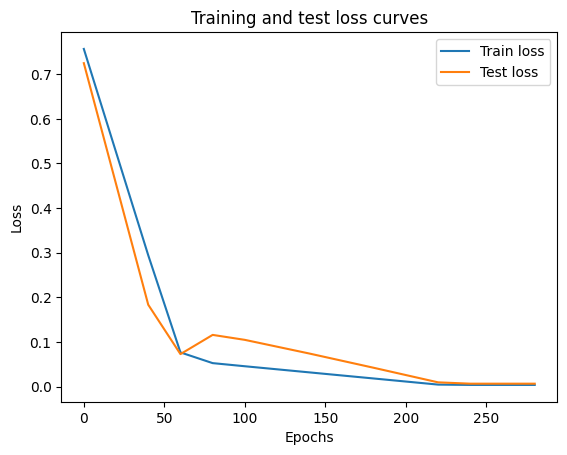

In [82]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_val, label="Train loss")
plt.plot(epoch_count, test_loss_val, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [83]:
# model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weights}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.3067])), ('bias', tensor([0.9011]))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


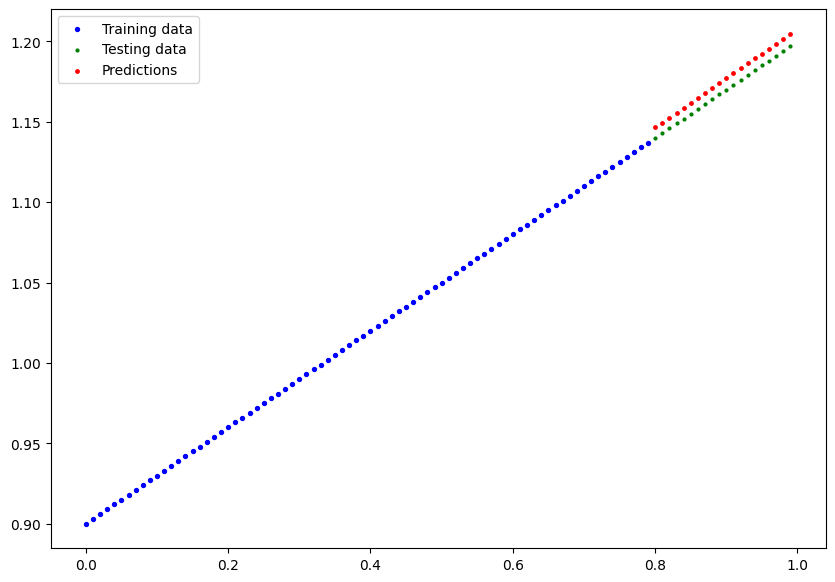

In [84]:
plot_pred(predictions=test_pred)

In [86]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("my_models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "my_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: my_models/my_model.pth


In [87]:
# Check the saved file path
!ls -l my_models/my_model.pth

-rw-r--r-- 1 root root 1502 Jan  5 16:43 my_models/my_model.pth


In [88]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_1 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [89]:
# 1. Put the loaded model into evaluation mode
loaded_model_1.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_1(X_test) # perform a forward pass on the test data with the loaded model

In [90]:
# Compare previous model predictions with loaded model predictions (these should be the same)
test_pred == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])